## Ejercicios

1. Simular una señal de ruido blanco y estimar su autocorrelación. Probar con $n=50$ y $n=200$ datos y discutir las diferencias.
2. Simular el proceso de media móvil visto anteriormente y estimar su autocorrelación. Probar nuevamente con $n=50$ y $n=200$ datos y discutir las diferencias.
3. Simular el proceso autorregresivo visto anteriormente y repetir la pregunta anterior. Discutir las diferencias entre los 3 procesos.

Sugerencia: usar los comandos `filter` y `acf` de R.

#### Parte 1


Simulamos los ruidos blancos

In [1]:
w1 = rnorm(50,0,1)  # Ruido Blanco n=50 N(0,1)
w2 = rnorm(200,0,1) #Ruido Blanco n=200 N(0,1)

In [2]:
library ("astsa")

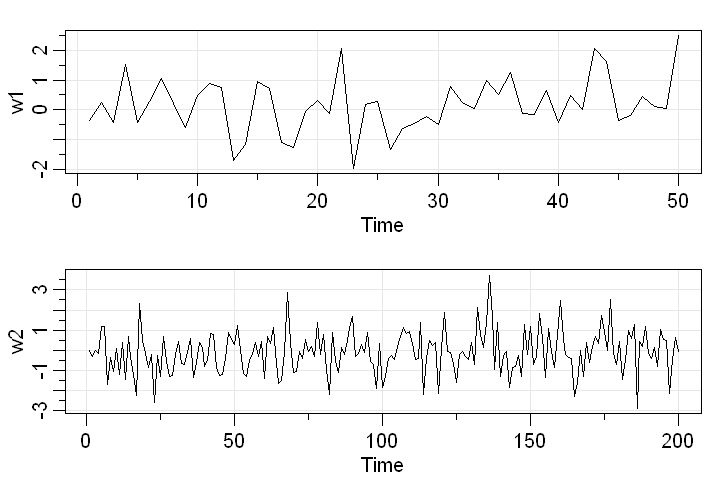

In [11]:
par(mfrow= c(2,1))
tsplot(w1)
tsplot(w2)
#Si tiene algún aporte sobre cómo achicar las letras de los gráficos, bienvenido. 

Planteamos los análisis de autocorrelación

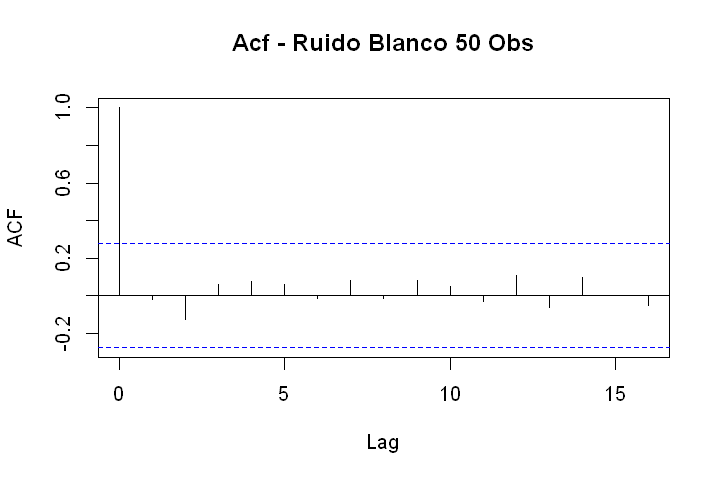

In [4]:
acf1 <- acf(w1, main = "Acf - Ruido Blanco 50 Obs")

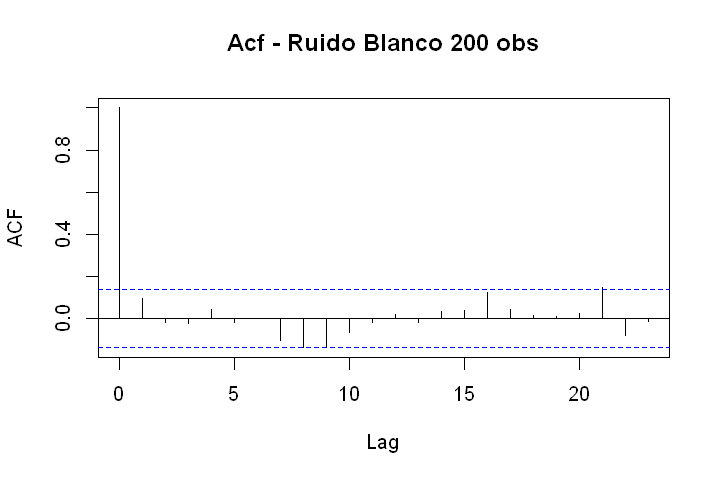

In [5]:
acf2 <- acf(w2, main = "Acf - Ruido Blanco 200 obs")

En ambos casos no se observa correlación fuera del primer lag. 

#### Parte 2

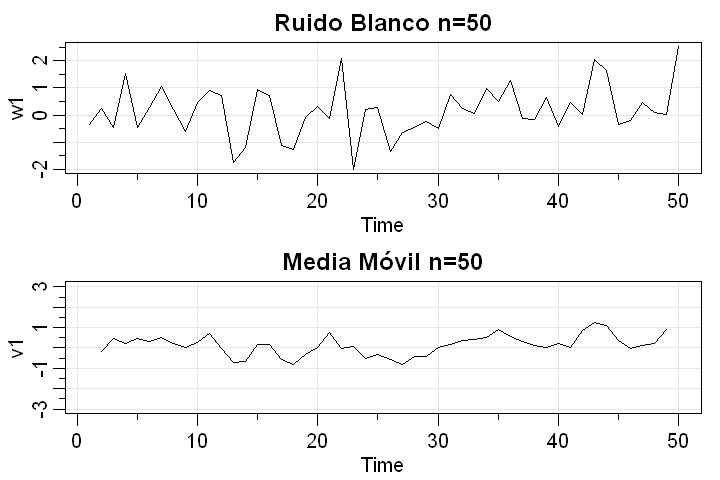

In [19]:

v1 = filter(w1, sides=2, rep(1/3,3))  # Media móvil de w1
par(mfrow=c(2,1))
tsplot(w1, main="Ruido Blanco n=50")
tsplot(v1, ylim=c(-3,3), main="Media Móvil n=50")
v1<- na.omit(v1)

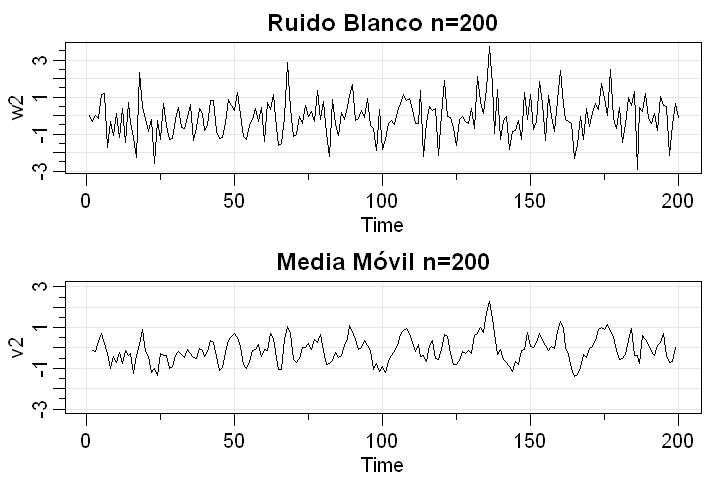

In [20]:
v2 = filter(w2, sides=2, rep(1/3,3))  # Media móvil de w2
par(mfrow=c(2,1))
tsplot(w2, main="Ruido Blanco n=200")
tsplot(v2, ylim=c(-3,3), main="Media Móvil n=200")
v2 <- na.omit(v2)


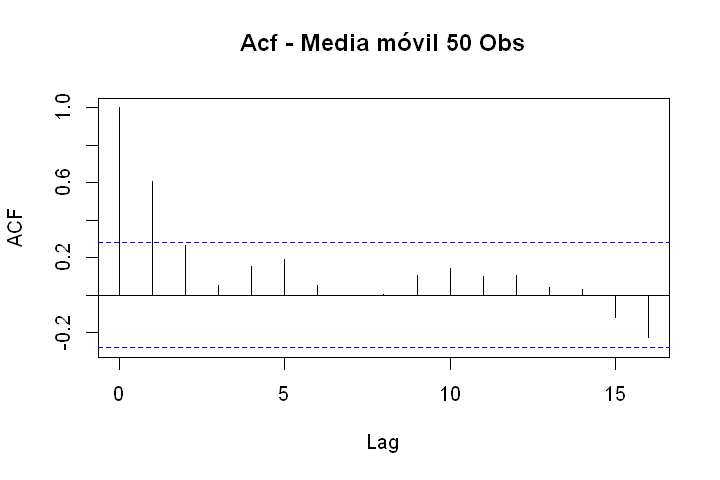

In [21]:
acf3 <- acf(v1, main = "Acf - Media móvil n = 50")


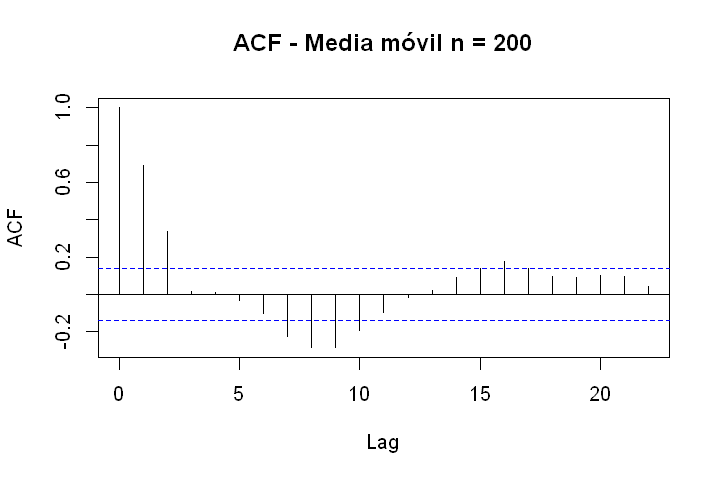

In [22]:
acf4 <- acf(v2, main = "ACF - Media móvil n = 200")

Si bien ambos procesos fueron generados de la misma manera, vemos que la cantidad de observaciones incide en la claridad del efecto que generan los cambios.

#### Parte 3

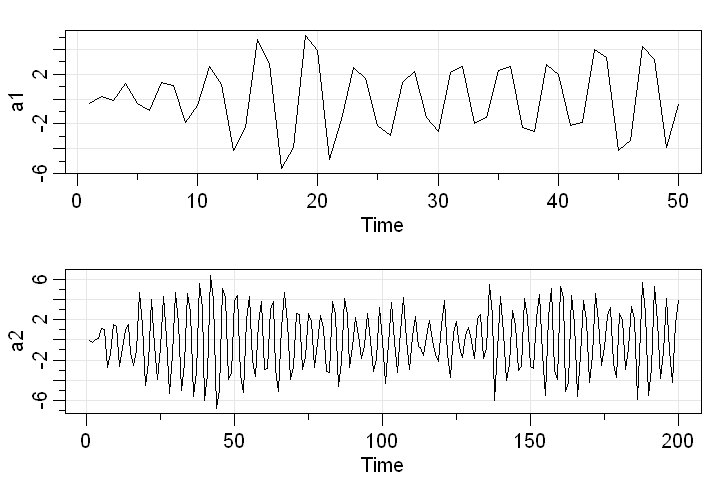

In [25]:
a1 = filter(w1, filter=c(0,-0.93), method="recursive")
a2 = filter(w2, filter=c(0,-0.93), method="recursive")

par(mfrow=c(2,1))
tsplot(a1)
tsplot(a2)

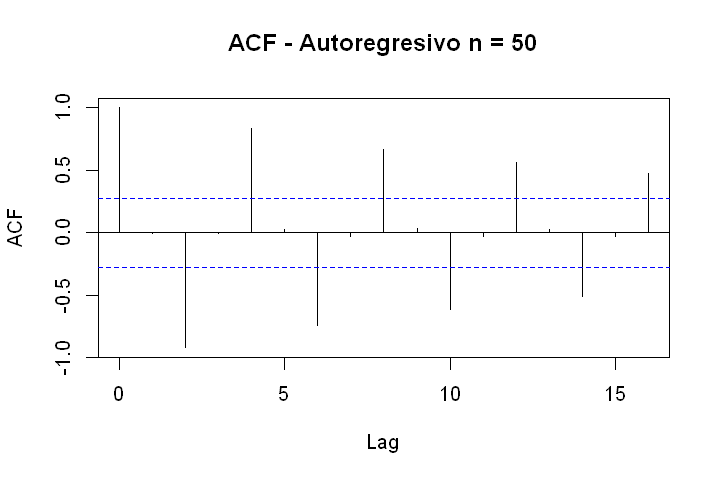

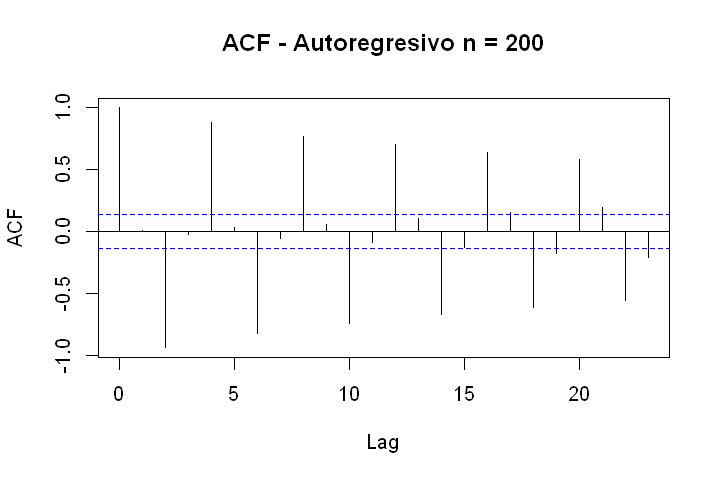

In [26]:
acf5 <- acf(a1, main="ACF - Autoregresivo n = 50")
acf6 <- acf(a2, main="ACF - Autoregresivo n = 200")


Al tratarse de un proceso autoregresivo el ACF es distinto al de un proceso de media móvil, siendo un gráfico que alterna entre movimientos. Si quisieramos ver la cantidad de rezagos que están correlacionados deberíamos observar el gráfico de PACF. 

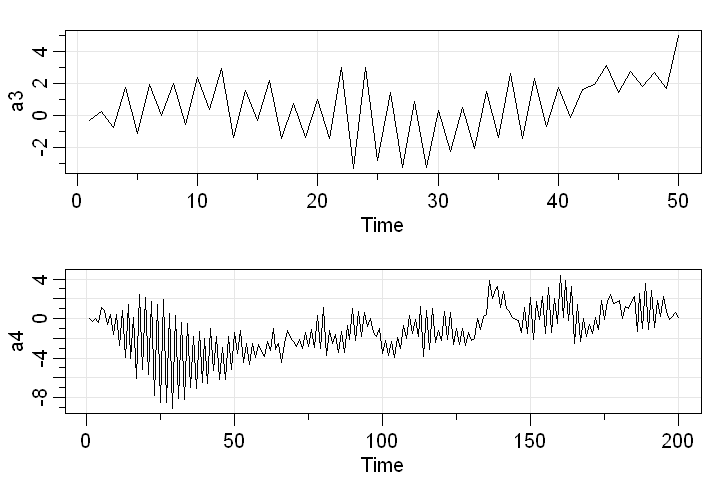

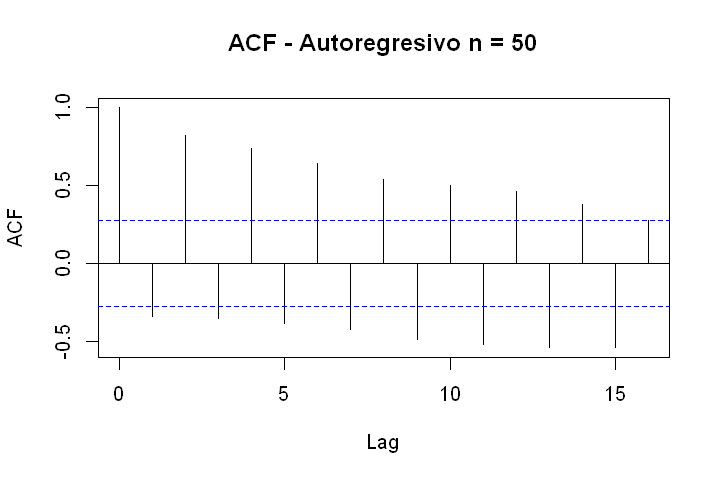

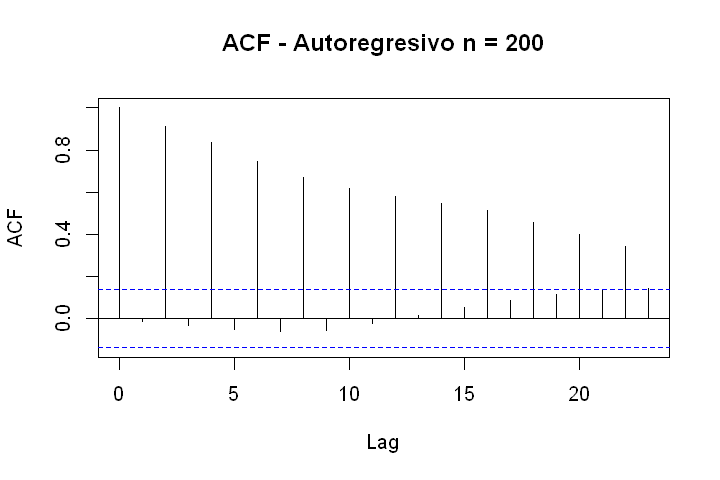